In [109]:
# Step 0. Load libraries and modules
# Dataframes and matrices ----------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Statistics -----------------------------------------------------------
import statsmodels.formula.api as smf
from statsmodels.api import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
# Preprocessing --------------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [110]:
# Step 1. Load the dataset
# Source: https://www.kaggle.com/code/sagarvarandekar/medical-insurance-regression-analysis-and-predict/notebook
df_raw = pd.read_csv('../data/raw/insurance.csv')

In [111]:
# 1.1 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [112]:
# 1.2 Take a sample
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
397,21,male,31.020,0,no,southeast,16586.49771
946,42,male,35.800,2,no,southwest,7160.09400
864,51,male,25.400,0,no,southwest,8782.46900
94,64,female,31.300,2,yes,southwest,47291.05500
442,18,male,43.010,0,no,southeast,1149.39590
655,52,female,25.300,2,yes,southeast,24667.41900
630,53,male,36.100,1,no,southwest,10085.84600
274,25,male,27.550,0,no,northwest,2523.16950
930,26,male,46.530,1,no,southeast,2927.06470
637,35,female,38.095,2,no,northeast,24915.04626


In [113]:
# 1.3 Transform if needed
df_transformed = df_raw.copy()
df_transformed['sex']= pd.Categorical(df_transformed['sex'])
df_transformed['smoker']= pd.Categorical(df_transformed['smoker'])
df_transformed['region'] =pd.Categorical(df_transformed['region'])
df_transformed['charges'] = round(df_transformed['charges'],1)

In [114]:
df = df_transformed.copy()

In [115]:
# Step 2. Make a basic EDA

In [116]:
# 2.1 Split the dataset so to avoid bias
X = df.drop(['charges'], axis=1)
y = df.charges
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [117]:
# 2.2 Join the train sets to ease insights
df_train = pd.concat([X_train, y_train], axis = 1)

In [118]:
# 2.3 Get basic info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 827 to 1281
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1003 non-null   int64   
 1   sex       1003 non-null   category
 2   bmi       1003 non-null   float64 
 3   children  1003 non-null   int64   
 4   smoker    1003 non-null   category
 5   region    1003 non-null   category
 6   charges   1003 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 42.6 KB


In [119]:
# 2.4 Take a sample
df_train.sample(10)

,age,sex,bmi,children,smoker,region,charges
724,50,female,27.075,1,no,northeast,10106.1
153,42,female,23.370,0,yes,northeast,19964.7
959,48,male,36.670,1,no,northwest,28468.9
513,19,male,30.400,0,no,southwest,1256.3
360,48,female,32.300,2,no,northeast,10043.2
311,19,female,24.700,0,no,southwest,1737.4
500,29,male,34.400,0,yes,southwest,36197.7
778,35,male,34.320,3,no,southeast,5934.4
803,18,female,42.240,0,yes,southeast,38792.7
556,46,male,33.440,1,no,northeast,8334.6


In [120]:
# 2.5 Describe the numerical and date variables
df_train.describe()

,age,bmi,children,charges
count,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.142572,30.639581,1.115653,13286.510768
std,13.982046,6.177580,1.218038,12257.531215
min,18.000000,15.960000,0.000000,1121.900000
25%,26.000000,25.935000,0.000000,4703.000000
50%,39.000000,30.360000,1.000000,9301.900000
75%,51.000000,34.770000,2.000000,16453.300000
max,64.000000,49.060000,5.000000,63770.400000


In [121]:
# 2.6 Describe categorical variables
df_train.describe(include='category')

,sex,smoker,region
count,1003,1003,1003
unique,2,2,4
top,male,no,southeast
freq,516,800,278


In [122]:
(278/1003)*100

27.716849451645064

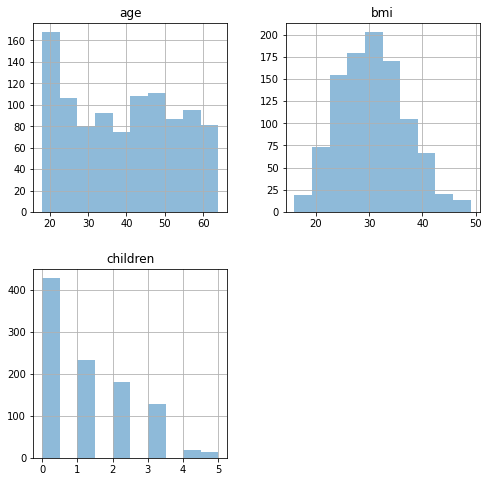

In [123]:
# 2.7 Perform univariate analysis - histograms
X_train.hist(figsize=(8,8), alpha=0.5)
plt.show()

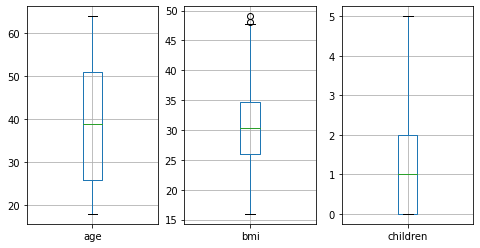

In [124]:
# 2.8 Perform univariate analysis - boxplots
fig, ax = plt.subplots(1,3,figsize=(8,4))
axs = ax.flatten()
for i in range(len(axs)):
    X_train._get_numeric_data().iloc[:,i].to_frame().boxplot(ax=axs[i])

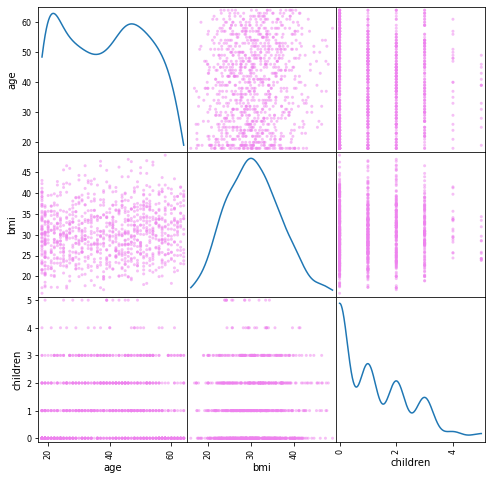

In [125]:
# 2.9 Perform bivariate analysis - numericals
pd.plotting.scatter_matrix(X_train,diagonal='kde', figsize=(8,8), c='Violet')
plt.show()

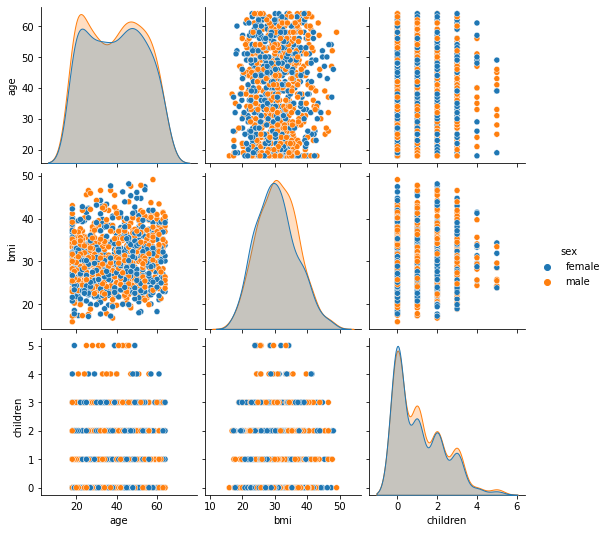

In [126]:
# 2.10 Perform bivariate analysis per category
sns.pairplot(data=X_train,hue='sex')
plt.show()

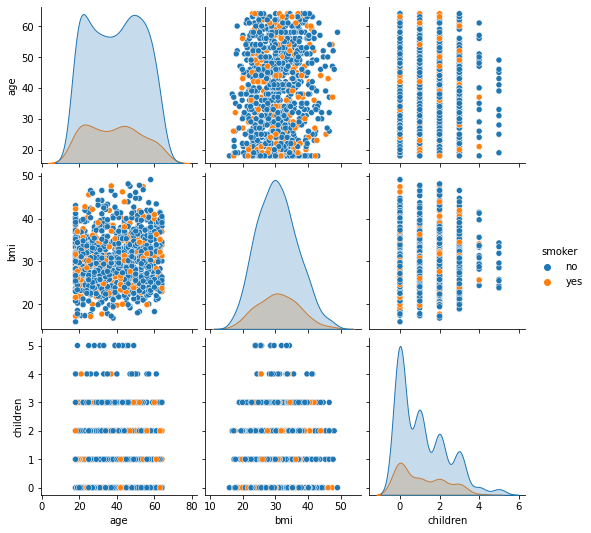

In [127]:
sns.pairplot(data=X_train,hue='smoker')
plt.show()

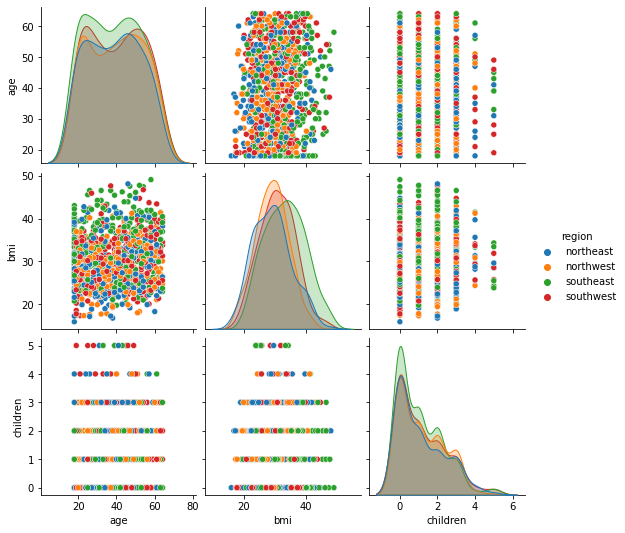

In [128]:
sns.pairplot(data=X_train,hue='region')
plt.show()

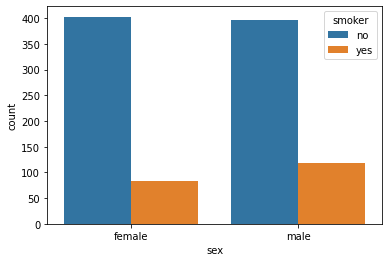

In [129]:
# 2.11 Perform bivariate categorical analysis 
sns.countplot(data=X_train, x='sex',hue='smoker')
plt.show()

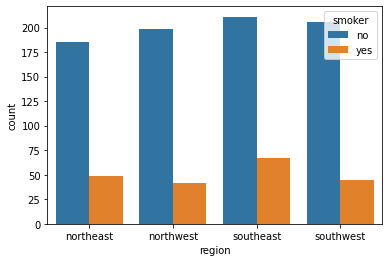

In [130]:
sns.countplot(data=X_train, x='region',hue='smoker')
plt.show()

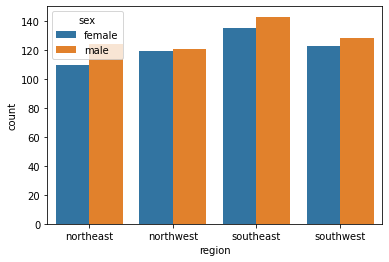

In [131]:
sns.countplot(data=X_train, x='region',hue='sex')
plt.show()

In [132]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial
X_train.corr().style.background_gradient(cmap='Blues')


,age,bmi,children
age,1.000000,0.105438,0.049017
bmi,0.105438,1.000000,0.008793
children,0.049017,0.008793,1.000000


No hay correlación entre las variables

In [133]:
# 2.11 Perform multivariate analysis - VIF
# https://thecodingbot.com/vif-implementation-in-python/
# https://github.com/statsmodels/statsmodels/issues/2376
# https://www.statology.org/how-to-calculate-vif-in-python/
# See what happens when no constant is added!

vif = pd.DataFrame()
X_numeric = X_train._get_numeric_data()
X_numeric = add_constant(X_numeric)
vif['features'] = X_numeric.columns
vif['Vif'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
vif

,features,Vif
0,const,31.452370
1,age,1.013613
2,bmi,1.011256
3,children,1.002422


Si el VIF da menos de 5 hay poca colinealidad
<5 no hay peligro de colinealidad
5~10 hay alto riesgo de multicolinealidad
>10 hay altisima de multicolinealidad

In [134]:
# 2.12 Analyze effect on response variable (DV)
df_train.corr().style.background_gradient(cmap='Blues')

,age,bmi,children,charges
age,1.000000,0.105438,0.049017,0.289447
bmi,0.105438,1.000000,0.008793,0.189909
children,0.049017,0.008793,1.000000,0.064911
charges,0.289447,0.189909,0.064911,1.000000


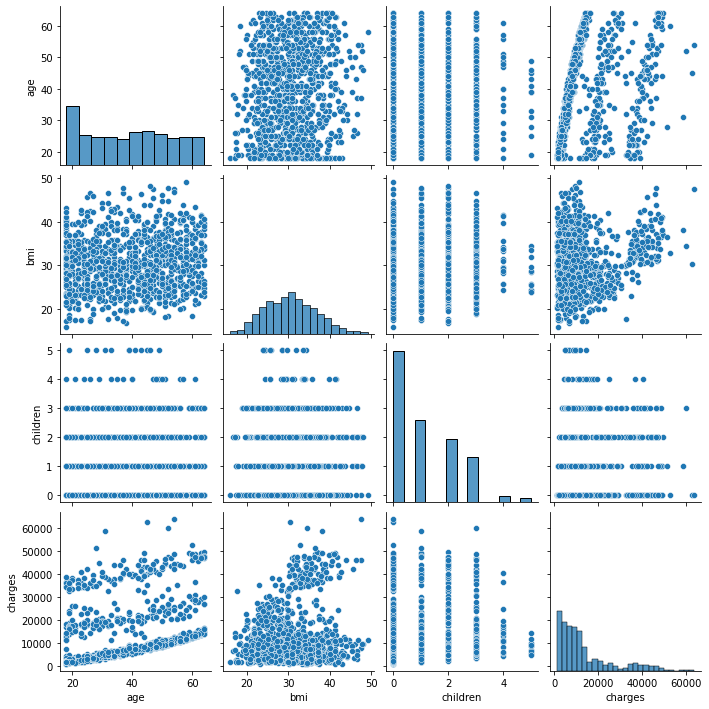

In [135]:
sns.pairplot(data=df_train)
plt.show()

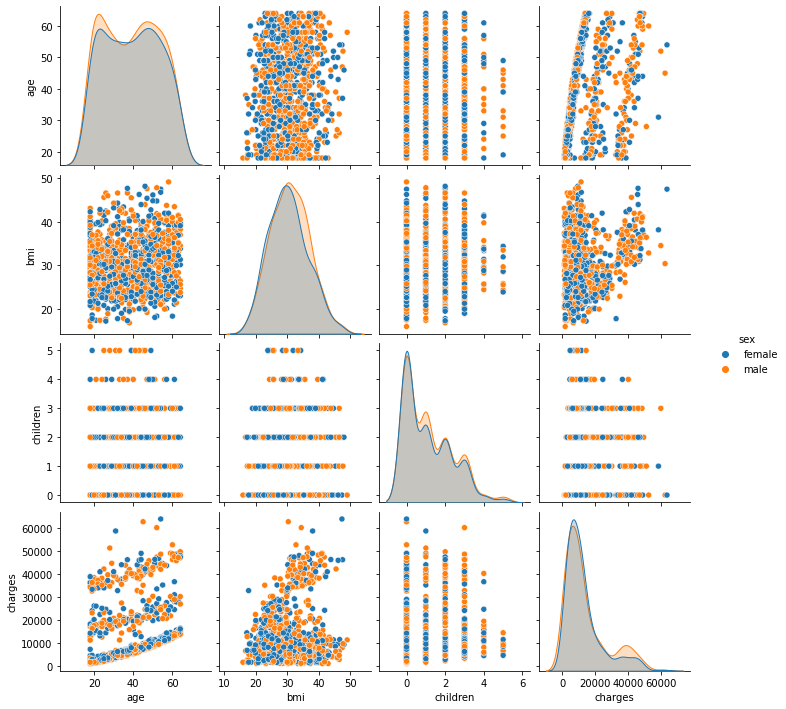

In [136]:
sns.pairplot(data=df_train, hue='sex')
plt.show()

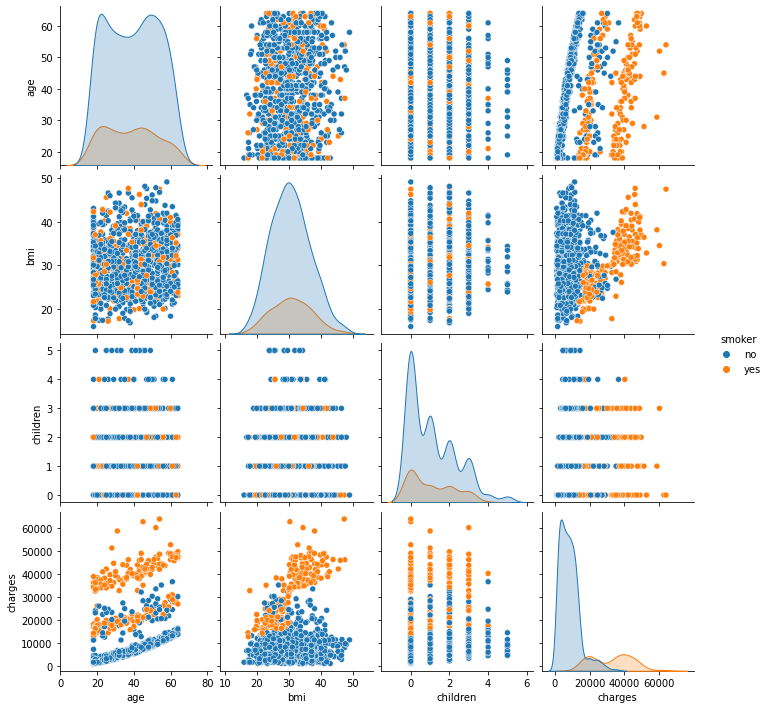

In [137]:
sns.pairplot(data=df_train, hue='smoker')
plt.show()

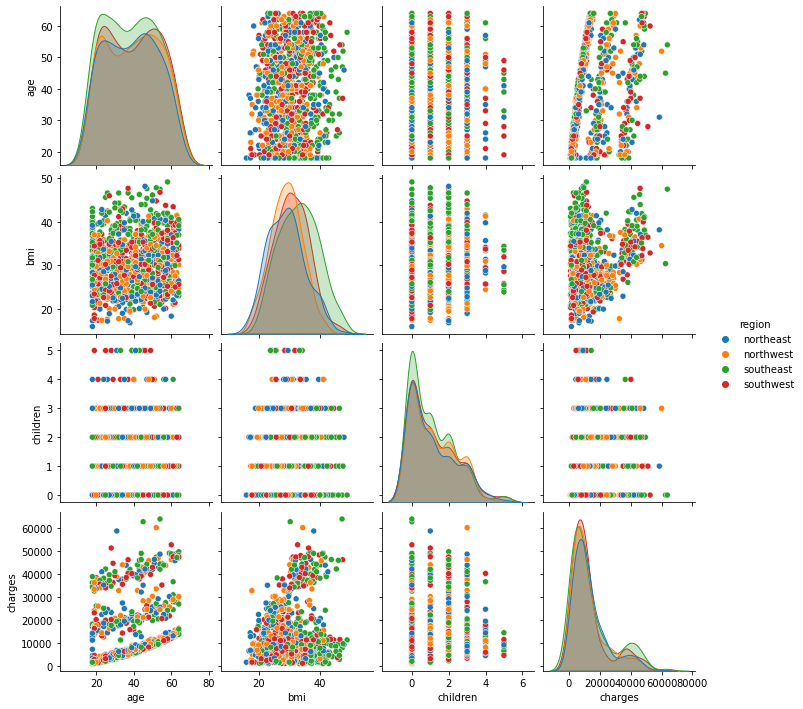

In [138]:
sns.pairplot(data=df_train, hue='region')
plt.show()

In [139]:
# Step 3. Create and evaluate model - Define your approach and goals
# A. Try out Linear Regression, use Statsmodels to verify assumptions
# B. Try out Tree Regression
# C. Try out Random Forest regression
# D. Compare results based on metrics reduction
# Current evidence: Some linear relation between response, age and bmi
# stratified by smoker condition



In [140]:
# 3.1 Create your pipeline processing. Secuencia de pasos
# https://stackoverflow.com/questions/61641852/
# https://jaketae.github.io/study/sklearn-pipeline/

cat_cols = X_train.select_dtypes(include='category').columns
num_cols = X_train.select_dtypes(include='number').columns
cat_transformer_d = Pipeline(steps=[('onehot', OneHotEncoder(drop='first',sparse=False))]) # para datos categoricos. OneHotEncoder transforma variables categóricas en numéricas. drop='first sacamos la variable de referencia. Para usar en Regresion
cat_transformer_nd = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))]) # para usar en Random Forest y Decision Tree
num_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

preprocessor_d = ColumnTransformer(transformers=[('num', num_transformer, num_cols),('cat', cat_transformer_d, cat_cols)])
preprocessor_nd = ColumnTransformer(transformers=[('num', num_transformer, num_cols),('cat', cat_transformer_nd, cat_cols)])

encode_data_d = Pipeline(steps=[('preprocessor', preprocessor_d)]) # categorias en n-1 columnas
encode_data_nd = Pipeline(steps=[('preprocessor', preprocessor_nd)])


In [141]:
# 3.2 Perform model fit - A
lreg = Pipeline(steps=[('preprocessor', preprocessor_d), ('regressor', LinearRegression())])
lreg.fit(X_train, y_train)
print(f'R^2 Score: {lreg.score(X_train, y_train)}')

R^2 Score: 0.7606462853034327


In [142]:
# 3.2.1 Calculate metrics on model A
y_pred = lreg.predict(X_test)
print(f'R^2 score: {r2_score(y_test, y_pred)}')
print(f'MSE score: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE score: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 score: 0.7123585633874021
MSE score: 39089718.481510684
RMSE score: 6252.177099339932


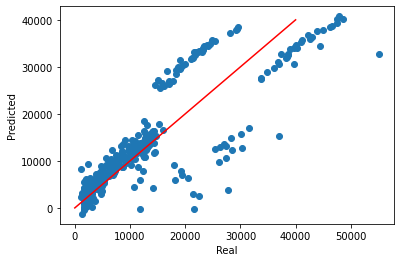

In [143]:
plt.scatter(x=y_test, y=y_pred)
plt.plot([0, 40000],[0, 40000], color='Red')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [144]:
# 3.2.2 Perform validation model fit - A (LR in Statsmodels)
#trans_f = Pipeline(steps=[('preprocessor', preprocessor_d)])

cat_vars_enc = encode_data_d.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names()
cat_vars_enc

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_male', 'x1_yes', 'x2_northwest', 'x2_southeast',
       'x2_southwest'], dtype=object)

In [145]:
matrix_train = encode_data_d.fit_transform(X_train)
matrix_train # Al pasar a una matríz numpy, se pierde el índice

array([[0.39130435, 0.36450151, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.11767372, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.7173913 , 0.47356495, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.65217391, 0.39093656, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.15217391, 0.14622356, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.63043478, 0.35302115, 0.4       , ..., 1.        , 0.        ,
        0.        ]])

In [146]:
#['x0_male', 'x1_yes', 'x2_northwest', 'x2_southeast','x2_southwest']
selected_columns = ['age', 'bmi', 'children', 'male', 'smoker', 'northwest', 'southeast', 'southwest']
df_lr = pd.DataFrame(matrix_train, columns=selected_columns)
df_st = pd.concat([df_lr, y_train.reset_index(drop=True)], axis=1)
df_st

,age,bmi,children,male,smoker,northwest,southeast,southwest,charges
0,0.391304,0.364502,0.2,1.0,1.0,0.0,0.0,0.0,20773.6
1,0.391304,0.117674,0.0,0.0,0.0,0.0,0.0,0.0,5458.0
2,0.717391,0.473565,0.0,1.0,0.0,1.0,0.0,0.0,9174.1
3,0.000000,0.541390,0.0,0.0,0.0,0.0,1.0,0.0,11482.6
4,0.934783,0.459215,0.0,0.0,0.0,1.0,0.0,0.0,13429.0
...,...,...,...,...,...,...,...,...,...
998,0.826087,0.339577,0.0,0.0,0.0,0.0,0.0,1.0,11073.2
999,0.000000,0.425076,0.2,1.0,0.0,0.0,1.0,0.0,1720.4
1000,0.652174,0.390937,0.0,0.0,0.0,0.0,0.0,1.0,8277.5
1001,0.152174,0.146224,0.2,0.0,0.0,0.0,0.0,1.0,3208.8


In [147]:
formula = 'charges ~ age + bmi + children + male + smoker +	northwest +	southeast + southwest' # charges es un Combinacion Lineal de age ... southwest
result = smf.ols(formula=formula, data=df_st).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     394.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.21e-302
Time:                        23:40:53   Log-Likelihood:                -10148.
No. Observations:                1003   AIC:                         2.031e+04
Df Residuals:                     994   BIC:                         2.036e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1444.1887    673.225     -2.145      0.0

https://es.wikipedia.org/wiki/Estad%C3%ADstico_de_Durbin-Watson

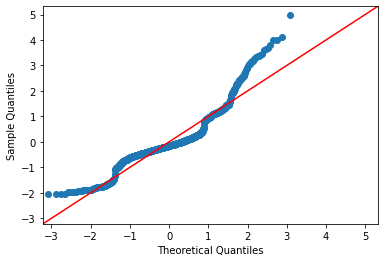

In [148]:
res = result.resid
fig = qqplot(res, line='45', fit=True)
plt.show()

In [149]:
# 3.3 Perform model fit - B
tree_reg = Pipeline(steps=[('preprocessor', preprocessor_nd), ('regressor', DecisionTreeRegressor())])
tree_reg.fit(X_train, y_train)
print(f"R2 Score:{tree_reg.score(X_train, y_train)}")

R2 Score:1.0


In [150]:
# 3.3.1 Calculate metrics - B
y_pred = tree_reg.predict(X_test)
print(f'R^2 score: {r2_score(y_test, y_pred)}')
print(f'MSE score: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE score: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 score: 0.6543585483436187
MSE score: 46971768.740626864
RMSE score: 6853.595314915148


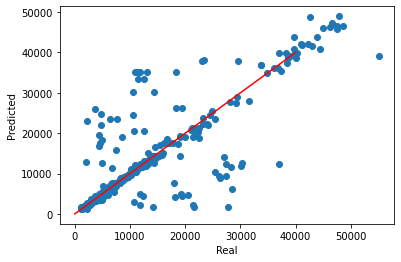

In [151]:
plt.scatter(x=y_test, y=y_pred)
plt.plot([0, 40000],[0, 40000], color='Red')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [152]:
# 3.4 Perform model fit - C
rf_reg = Pipeline(steps=[('preprocessor', preprocessor_nd), ('regressor', RandomForestRegressor())])
rf_reg.fit(X_train, y_train)
print(f"R2 Score:{rf_reg.score(X_train, y_train)}")

R2 Score:0.978701440043135


In [153]:
# 3.4.1 Calculate metrics on model B
y_pred = rf_reg.predict(X_test)
print(f'R^2 score: {r2_score(y_test, y_pred)}')
print(f'MSE score: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE score: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 score: 0.8125604322253566
MSE score: 25472546.733504772
RMSE score: 5047.0334587265


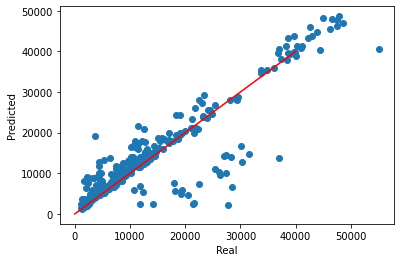

In [158]:
plt.scatter(x=y_test, y=y_pred)
plt.plot([0, 40000],[0, 40000], color='Red')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

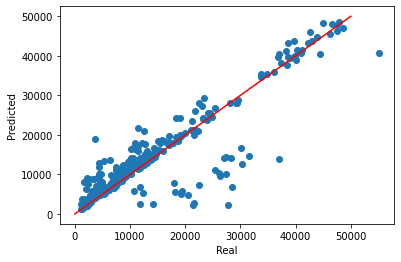

In [159]:
plt.scatter(x=y_test, y=y_pred)
plt.plot([0, 50000],[0, 50000], color='Red')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [155]:
# Step 4. Write up your conclusions